In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.DataFrame({"batch_size": [2 ** i for i in range(5, 20)], "mibps": [0.3055, 0.6116, 1.2171, 2.6083, 5.0547, 10.2904, 19.6689, 40.3122, 78.3601, 144.4085, 247.0356, 431.9281, 681.5703, 920.8103, 927.9881]})

In [3]:
df2= df.copy()
df2["mibps"] = df2["mibps"] * 0.8
df2["broker"] = "KafkaDirect"
df["broker"] = "Ghostwriter"

In [4]:
data = pd.concat([df, df2])

In [5]:
df

,batch_size,mibps,broker
0,32,0.3055,Ghostwriter
1,64,0.6116,Ghostwriter
2,128,1.2171,Ghostwriter
3,256,2.6083,Ghostwriter
4,512,5.0547,Ghostwriter
5,1024,10.2904,Ghostwriter
6,2048,19.6689,Ghostwriter
7,4096,40.3122,Ghostwriter
8,8192,78.3601,Ghostwriter
9,16384,144.4085,Ghostwriter


In [6]:
from matplotlib import font_manager

font_files = font_manager.findSystemFonts("/usr/share/fonts/opentype/linux-libertine")
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [7]:
sns.axes_style("whitegrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

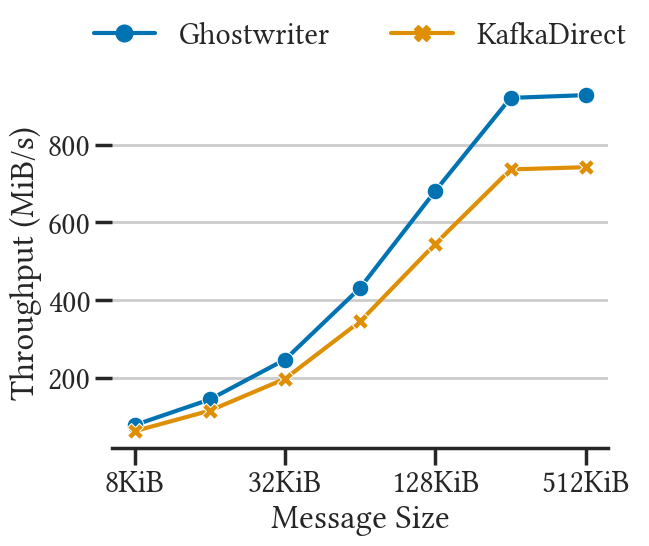

In [17]:
sns.set_theme(
    context="poster", 
    style="ticks", 
    rc={
        'grid.linestyle': '-', 
        'axes.grid': True, 
        "axes.grid.axis": "y",
        "legend.frameon": False,
    }, font="Linux Libertine O", palette="colorblind")
g = sns.lineplot(data=data[data["batch_size"] > 8000], x="batch_size", y="mibps", hue="broker", style="broker", markers=True, dashes=False)
g.set_xscale("log")
g.set_xlabel("Message Size")
g.set_ylabel("Throughput (MiB/s)")
sns.despine(left=True)
g.set_xticks([8192, 32768, 131072, 524288], ['8KiB', '32KiB','128KiB','512KiB'], minor=False)

#g.set_xticks([32, 128, 512, 2048, 8192, 32768, 131072, 524288], ['32B', '128B', '512B','2KiB', '8KiB', '32KiB','128KiB','512KiB'], minor=False)
g.minorticks_off()
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None
)